# Andmete visualiseerimine Matplotlibiga

Selles peatükis õpid, kuidas visualiseerida andmeid Pythonis, kasutades matplotlib-i ja pandas DataFrame'i. Näidetes kasutatakse islander_data andmestikku, mis on juba Pandasega sisse loetud. Visualiseerimine aitab andmetest mustreid ja seoseid paremini mõista.

## Scatterplot (punktdiagramm)
Scatterplot ehk punktdiagramm näitab kahe tunnuse omavahelist seost. Näiteks saab visualiseerida vanuse ja mälu skoori seost.

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import os

print(os.listdir('/content/drive/MyDrive'))

['Colab Notebooks', 'HERMA-8017-63,5x38,1 MESI.ai', 'HERMA-8017-63,5x38,1 MESI_VORMSILT.ai', 'HERMA-8017-63,5x38,1 MESI_TARTUST.ai', 'Adobe alternatiivid.jpeg', 'CV Imbi Jaks 2020 08 31.pdf', 'CV Imbi Jaks 2020 08 24.docx', 'Minu olemasolevad roosid.ai', 'Minu olemasolevad roosid-01.jpg', 'Kokkamine', 'Mikrobioota loeng 02 2020', 'Tänapäeva-Mesindus-2019.pdf', 'RPReplay_Final1615192515.mov', 'IMG_8666.PNG', 'IMG_8964.jpg', 'Ettekanded koos 21 06 2022 - 1.pptx', 'Olulist 2022 06.docx', 'Rahva Raamat Ekviitung  201000276961_D20221005T08444122Z.pdf', 'Selgeltnägijate tuleproov 2022 8 saade ilma reklaamita.mp4', 'Trennipäevik 2023.gsheet', 'remus', 'Olulist 2022 08.docx', 'Kleebised', 'WOPI testi tagasiside Cleliaga - Imbi Jaks 2023 SAATMISEKS.mp4', 'Nimetu dokument.gdoc', 'Sünnipäev 2024', 'Nõustamine', '003. Peteri printsiip.mp3', '002. Peteri printsiip.mp3', '005. Peteri printsiip.mp3', '007. Peteri printsiip.mp3', '008. Peteri printsiip.mp3', '006. Peteri printsiip.mp3', '001. P

In [10]:
import os

os.listdir('/content/drive/My Drive/Colab Notebooks')

['Märkmiku Matplotlib.ipynb koopia',
 'Islander_data.csv',
 'example1.txt',
 'Märkmiku Intro.ipynb koopia',
 'Seminar 2 kodutööd.ipynb']

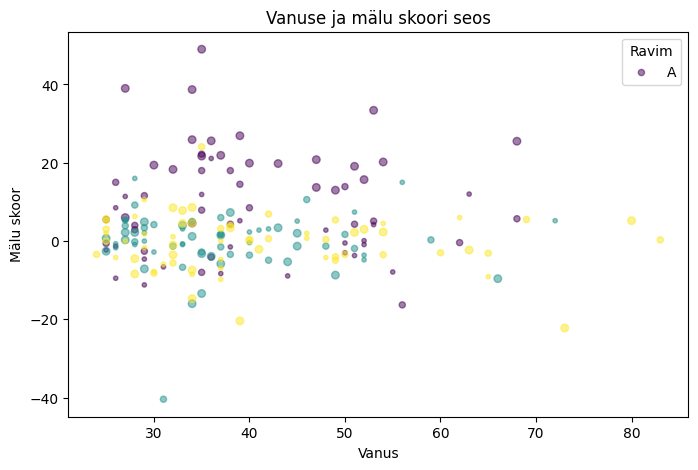

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Andmestiku lugemine
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Islander_data.csv')

# Scatterplot: vanus vs mälu skoor
plt.figure(figsize=(8,5))
# c - color, s - size
plt.scatter(df['age'], df['Diff'], c=df['Drug'].astype('category').cat.codes, s=df['Dosage']*10, alpha=0.5)
plt.xlabel('Vanus')
plt.ylabel('Mälu skoor')
plt.title('Vanuse ja mälu skoori seos')
plt.legend(title='Ravim', labels=df['Drug'].unique())
plt.show()

**Süntaksi selgitus:**
- `plt.scatter(x, y)`: joonistab punktdiagrammi, kus x ja y on Pandase veerud
- `plt.xlabel()`, `plt.ylabel()`: telgede nimed
- `plt.title()`: diagrammi pealkiri
- `plt.show()`: näitab diagrammi notebookis

## Bar plot (tulpdiagramm)
Bar plot ehk tulpdiagramm sobib kategooriate võrdlemiseks, näiteks ravimite keskmise mälu skoori võrdlus.

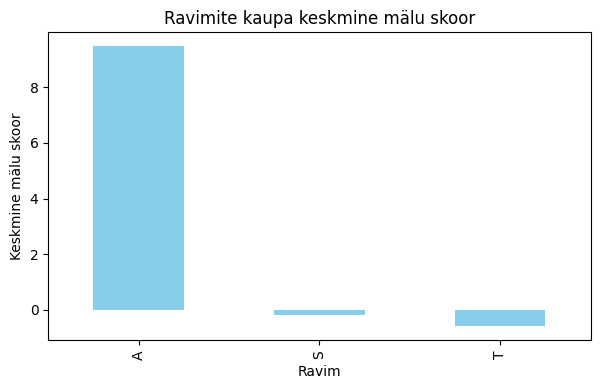

In [12]:
# Ravimite kaupa keskmise mälu skoori tulpdiagramm
mean_scores = df.groupby('Drug')['Diff'].mean()
plt.figure(figsize=(7,4))
mean_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Ravim')
plt.ylabel('Keskmine mälu skoor')
plt.title('Ravimite kaupa keskmine mälu skoor')
plt.show()

## Boxplot (kastdiagramm)
Boxplot näitab tunnuse jaotust ja äärmusi, näiteks vanuse jaotust erinevate ravimite lõikes.

<Figure size 700x400 with 0 Axes>

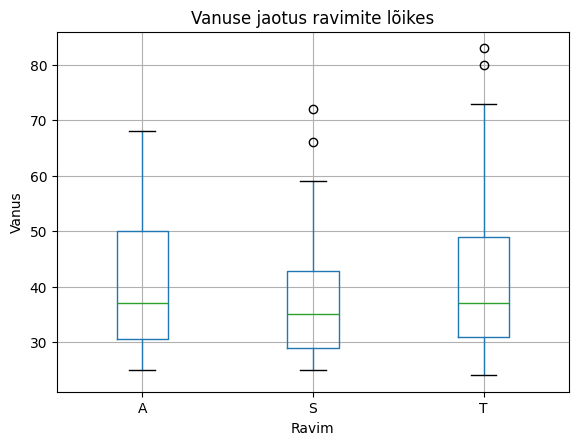

In [13]:
# Vanuse jaotus ravimite lõikes
plt.figure(figsize=(7,4))
df.boxplot(column='age', by='Drug')
plt.xlabel('Ravim')
plt.ylabel('Vanus')
plt.title('Vanuse jaotus ravimite lõikes')
plt.suptitle('')
plt.show()

## Linegraph (joongraafik)
Linegraph sobib trendide ja muutuste visualiseerimiseks, näiteks keskmise mälu skoori muutus vanuse kasvades.

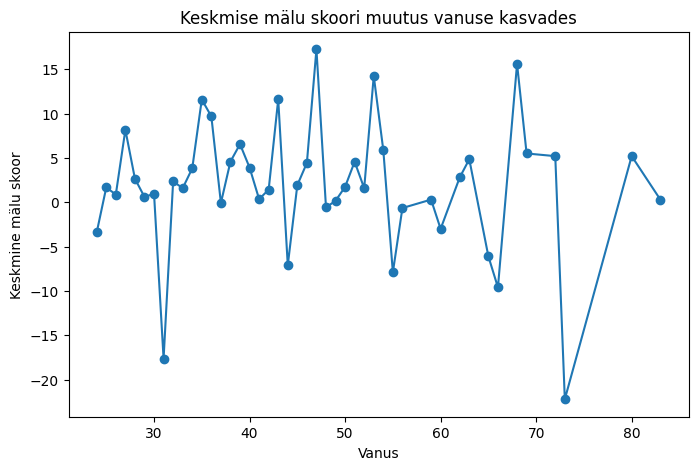

In [14]:
# Keskmine mälu skoor vanuse kaupa
age_means = df.groupby('age')['Diff'].mean()
plt.figure(figsize=(8,5))
plt.plot(age_means.index, age_means.values, marker='o')
plt.xlabel('Vanus')
plt.ylabel('Keskmine mälu skoor')
plt.title('Keskmise mälu skoori muutus vanuse kasvades')
plt.show()

**Süntaksi selgitused:**
- `plot(kind='bar')`: Pandase meetod tulpdiagrammi jaoks
- `boxplot(column, by)`: Pandase meetod kastdiagrammi jaoks
- `plt.plot()`: Matplotlibi joongraafik
- Telgede ja pealkirjade lisamine aitab diagrammi mõista

## Boxplot: 'diff' väärtus ravimite ja dooside kaupa
See boxplot näitab, kuidas mälu skoor ('diff') jaotub erinevate ravimite ja dooside lõikes.

<Figure size 1000x500 with 0 Axes>

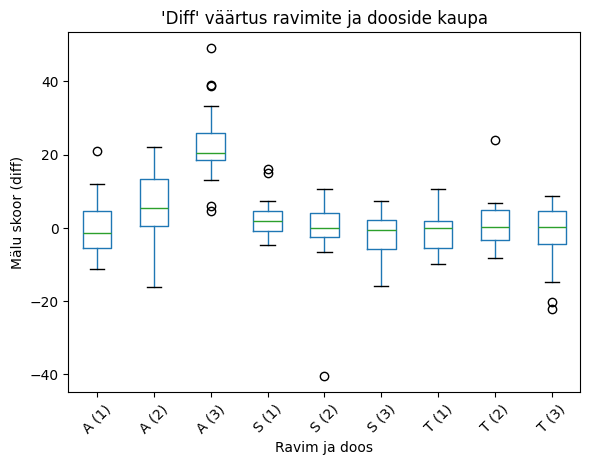

In [15]:
# Loome uue veeru, mis ühendab ravimi ja doosi
df['Drug_Dosage'] = df['Drug'] + ' (' + df['Dosage'].astype(str) + ')'
plt.figure(figsize=(10,5))
df.boxplot(column='Diff', by='Drug_Dosage', grid=False, rot=45)
plt.xlabel('Ravim ja doos')
plt.ylabel('Mälu skoor (diff)')
plt.title("'Diff' väärtus ravimite ja dooside kaupa")
plt.suptitle('')
plt.show()

## Mis edasi?
Kui soovid Matplotlibi kohta rohkem teada saada, vaata ametlikku dokumentatsiooni ja tutvustusi:

- [Matplotlib dokumentatsioon ja näited](https://matplotlib.org/stable/)
- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Data to Viz](https://www.data-to-viz.com/)

## Praktiline ülesanne: visualiseeri islander_data andmestikku

Vali islander_data andmestikust kaks või enam tunnust ja loo üks selge, informatiivne visualiseering (scatterplot, barplot, boxplot või linegraph). Mõtle, millist seost või mustrit soovid näidata. Kujunda pilt nii, et oleks selged teljed, pealkiri, vajadusel legend ja värvid.
Näiteks:
- kuidas mälu skoor sõltub vanusest või ravimist.
- kuidas annus mõjutab mälu skoori erinevates vanusegruppides (võimalik, et pead tulba uuesti looma). Tee igele ravimile eraldi plot või kasuta subplotte (vaata [Matplotlib subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) juhendit).

**Juhised:**
- Vali sobivad tunnused (veerud) visualiseerimiseks
- Lisa telgede nimed ja pealkiri
- Kasuta värve või suurusi, et tuua esile erinevusi
- Lisa legend, kui graafikul on mitu gruppi
- Selgita lühidalt, mida graafik näitab

<Figure size 1000x500 with 0 Axes>

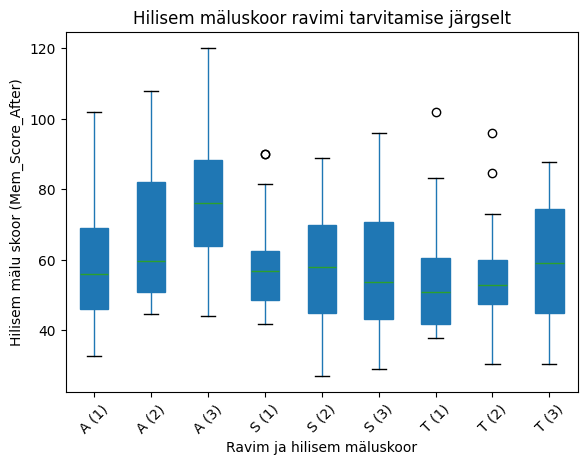

In [16]:
# Kirjuta siia oma visualiseeringu kood
# Näiteks: plt.scatter(...), plt.bar(...), df.boxplot(...), plt.plot(...)
# Lisa ka lühike selgitus, mida graafik näitab


# Loome uue veeru, mis ühendab ravimi ja hilisema mäluskoori
df['Drug_Mem_After'] = df['Drug'] + ' (' + df['Mem_Score_After'].astype(str) + ')'
plt.figure(figsize=(10,5))
df.boxplot(column='Mem_Score_After', by='Drug_Dosage', grid=False, rot=45, patch_artist=True)
# patch_artist=True lubab värvide kasutamise



plt.xlabel('Ravim ja hilisem mäluskoor')
plt.ylabel('Hilisem mälu skoor (Mem_Score_After)')
plt.title("Hilisem mäluskoor ravimi tarvitamise järgselt")
plt.suptitle('')
plt.show()